In [2]:
import pandas as pd

In [7]:
import seaborn as sns

In [174]:
import matplotlib.pyplot as plt

In [379]:
import numpy as np

In [11]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### Create a visual showing the relationship between horsepower and fuel economy.

Text(0.5, 1.0, 'Fuel Economy by Horsepower')

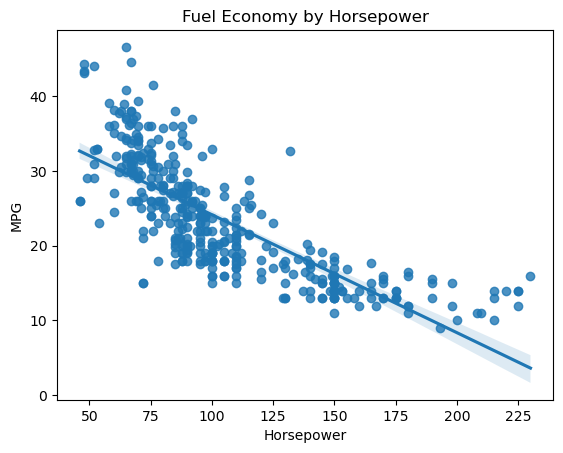

In [536]:
sns.regplot(
    data=mpg,
    x="horsepower", y="mpg")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Fuel Economy by Horsepower")

<div style="text-align: center; font-size: 15px; font-weight: bold;">
The scatter plot illustrates the trade-off between horsepower and fuel economy (mpg). The pronounced downward regression line signifies that, within this dataset, vehicles with higher horsepower tend to have significantly lower mpg. This relationship is typical in automotive engineering, where increased power often demands greater fuel consumption.
</div>

### Create a table summarizing fuel economy by country of origin

,origin,mpg
0,europe,27.891429
1,japan,30.450633
2,usa,20.083534


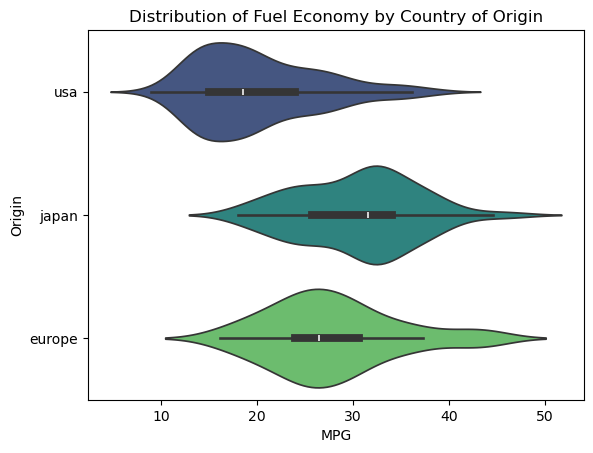

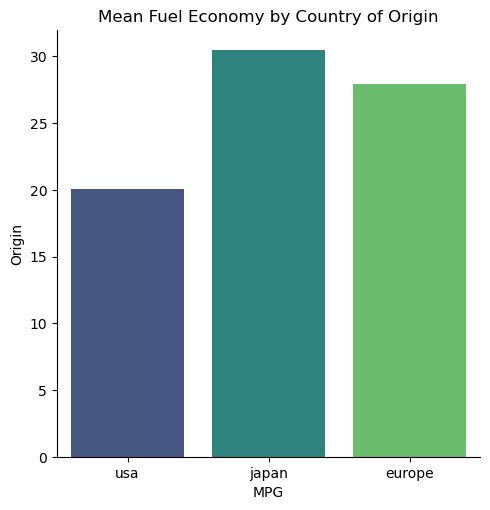

In [540]:
sns.violinplot(data=mpg, x="mpg", y="origin", hue="origin", palette="viridis")
plt.xlabel("MPG")
plt.ylabel("Origin")
plt.title('Distribution of Fuel Economy by Country of Origin')
sns.catplot(
    data=mpg,
    x="origin", y="mpg", hue= "origin", kind="bar", palette="viridis", errorbar=None)
plt.xlabel("MPG")
plt.ylabel("Origin")
plt.title('Mean Fuel Economy by Country of Origin')
mpg_mean = mpg.groupby(by="origin").mean(numeric_only=True)["mpg"].reset_index()
mpg_mean

<div style="text-align: center; font-size: 15px; font-weight: bold;">
The visualizations and table above show that Japan overall has the highest miles per gallon and therefore the best fuel economy of the countries included in the data set. The 'Distribution of Fuel Economy by Country of Origin' violin plot was included to illustrate the distribution and spread of fuel economy within each country, revealing the range and density of MPG values. This provides a more nuanced understanding than just the mean, highlighting potential variability and outliers.<br><br>
For instance, while Japan has the highest average, the violin plot shows the range of MPG values and its density, which is different than other countries. It helps to visualize not just the average performance, but also the consistency and variability of fuel efficiency across individual cars from each origin.
</div>

### Create a visual showing how fuel economy has changed over time

Text(0.5, 1.0, 'Fuel Economy Over Time')

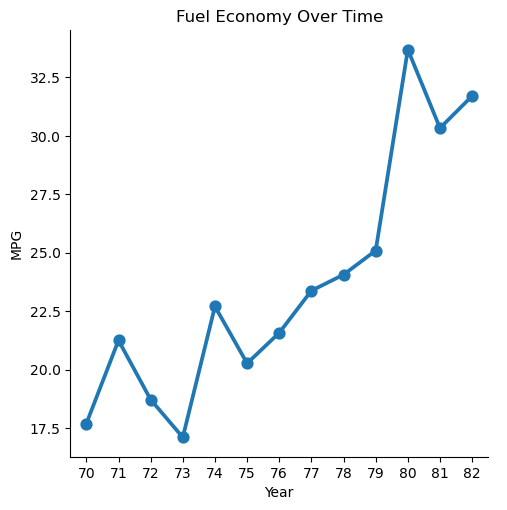

In [365]:
sns.catplot(
    data=mpg,
    x="model_year", y="mpg", kind="point", errorbar=None)
plt.xlabel("Year")
plt.ylabel("MPG")
plt.title("Fuel Economy Over Time")

<div style="text-align: center; font-size: 15px; font-weight: bold;">
The point chart above shows a relatively consistent trend upwards with fuel economy increasing year-by-year on average. However, there are a few outliers. Notably bad years were 1972,1973,1975, and 1981. While, notably good years were 1971, 1974, and 1980. I believe that these outliers may be due to car manufacturers shifting priorities based on economic pressures and market trends. In the years with MPG highs, manufacturers likely focused on fuel efficiency improvements by designing lighter, smaller-engine vehicles that maintain performance through efficiency gains rather than raw power. While the years with MPG lows, manufacturers likely relaxed fuel efficiency goals or consumer demand shifted toward larger, more powerful vehicles (e.g., trucks, SUVs, muscle cars), prioritizing power over efficiency. Additionally, emissions regulations in the mid-1970s (such as catalytic converters and lower compression ratios in 1975) may have led to inefficiencies as automakers adjusted, temporarily reducing fuel economy. Similarly, the early '80s (e.g., 1981) saw increased vehicle weight due to emerging safety regulations, which negatively impacted MPG.
<br><br>
The table below includes additional data points such as horsepower, vehicle weight, acceleration, and displacement to further illustrate the trade-offs between power, efficiency, and fuel economy in different years. Notably, years with lower MPG tend to have higher horsepower and weight, while years with better MPG often show reduced engine size and improved acceleration. 
</div>

In [350]:
mpg_mean_year = mpg.groupby(by="model_year")[["mpg", "horsepower","cylinders","acceleration","displacement","weight"]].mean().reset_index()
mpg_mean_year

,model_year,mpg,horsepower,cylinders,acceleration,displacement,weight
0,70,17.689655,147.827586,6.758621,12.948276,281.413793,3372.793103
1,71,21.250000,107.037037,5.571429,15.142857,209.750000,2995.428571
2,72,18.714286,120.178571,5.821429,15.125000,218.375000,3237.714286
3,73,17.100000,130.475000,6.375000,14.312500,256.875000,3419.025000
4,74,22.703704,94.230769,5.259259,16.203704,171.740741,2877.925926
5,75,20.266667,101.066667,5.600000,16.050000,205.533333,3176.800000
6,76,21.573529,101.117647,5.647059,15.941176,197.794118,3078.735294
7,77,23.375000,105.071429,5.464286,15.435714,191.392857,2997.357143
8,78,24.061111,99.694444,5.361111,15.805556,177.805556,2861.805556
9,79,25.093103,101.206897,5.827586,15.813793,206.689655,3055.344828


### Create two other visuals or tables related to fuel economy.

Text(0, 0.5, 'MPG')

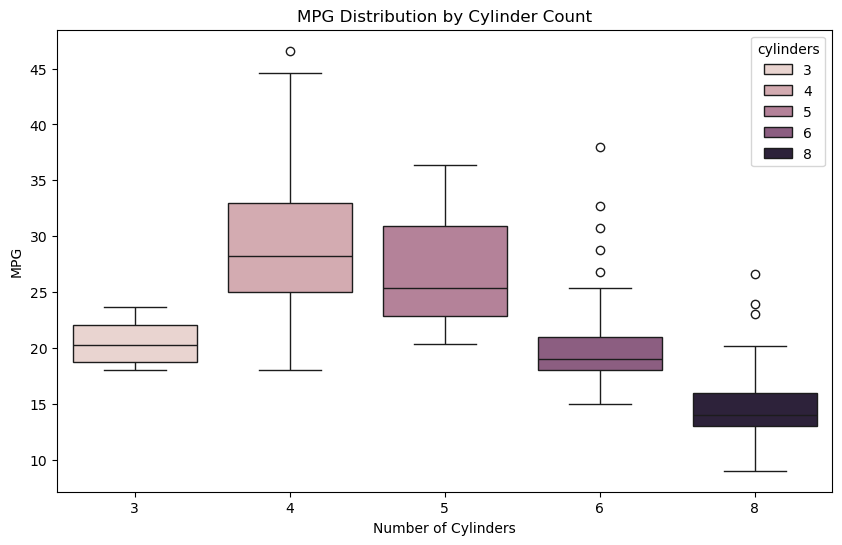

In [499]:
plt.figure(figsize=(10,6))
sns.boxplot(data=mpg, x="cylinders", y="mpg", hue="cylinders")
plt.title("MPG Distribution by Cylinder Count")
plt.xlabel("Number of Cylinders")
plt.ylabel("MPG")

<div style="text-align: center; font-size: 15px; font-weight: bold;">
The box plot demonstrates the distribution of fuel economy (mpg) across different engine cylinder counts. The plot reveals a clear trend: vehicles with fewer cylinders generally achieve higher mpg. Notably, 4-cylinder engines exhibit the highest median mpg, while vehicles with higher cylinder counts (e.g., 8 cylinders) show significantly lower median fuel efficiency and greater variability.<br><br> However, 3-cylinder engines represent an exception to this trend, showing a notably lower median mpg than 4-cylinder engines. This could be due to factors such as the specific vehicle models equipped with 3-cylinder engines, which may be heavier or designed for different performance characteristics, or a smaller sample size of 3-cylinder vehicles in the dataset.</div>

Text(0.5, 1.05, 'Weight vs. MPG by Origin')

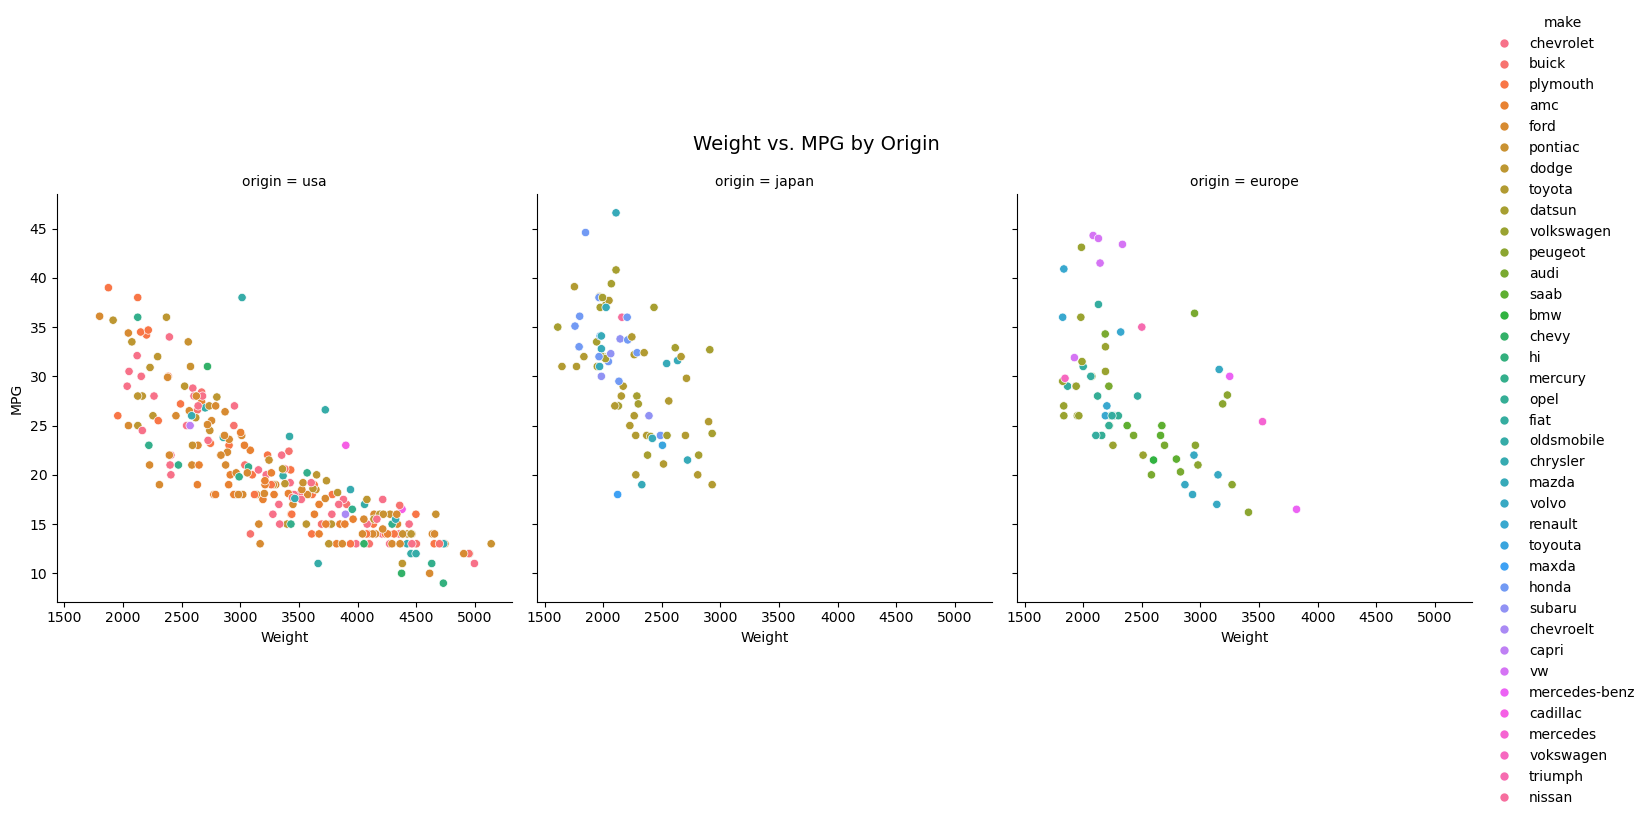

In [563]:
g= sns.relplot(
    data=mpg,
    x="weight", y="mpg", hue="make",col="origin")
for ax in g.axes.flat:
    ax.set_xlabel("Weight")
    ax.set_ylabel("MPG")
g.fig.suptitle("Weight vs. MPG by Origin", fontsize=14, y=1.05)

<div style="text-align: center; font-size: 15px; font-weight: bold;">The scatter plots effectively visualize the correlation between vehicle weight and fuel economy (mpg), segmented by origin. The US-made vehicles, dominating the higher weight spectrum, consistently show lower mpg, reflecting the prevalence of larger, heavier vehicles. This trend contrasts sharply with Japanese and European vehicles, which tend to be lighter and achieve higher mpg. The plots also highlight the distribution of vehicle weights within each origin, with the US showing the widest range and highest concentration of heavier vehicles.</div>

<div style="text-align: center; font-size: 20px;"><u><strong>SUMMARY</strong></u></div>

<div style="text-align: center; font-size: 15px; font-weight: bold;">This analysis explored the factors influencing vehicle fuel economy (mpg) using a dataset encompassing various vehicle attributes, origins, and model years. Several key trends emerged. Firstly, a clear inverse relationship exists between horsepower and mpg, demonstrating the inherent trade-off between power and efficiency in automotive design. Vehicles with higher horsepower consistently exhibited lower mpg, confirming the principle that increased power demands greater fuel consumption.<br><br> Secondly, significant variations in fuel economy were observed across different countries of origin. Japan emerged as the leader in fuel efficiency, showcasing the highest average mpg and a relatively consistent distribution of fuel economy values. Conversely, US-made vehicles tended to be heavier and displayed lower mpg, reflecting the prevalence of larger vehicles in the American market. European vehicles occupied a middle ground, demonstrating a balance between weight and fuel efficiency.<br><br> Thirdly, an analysis of fuel economy trends over time revealed a general upward trajectory, indicating improvements in fuel efficiency over the years. However, notable outliers were identified, suggesting that economic pressures, market trends, and regulatory changes have influenced vehicle design and fuel economy. For example, the mid-1970s and early 1980s saw temporary dips in fuel economy, potentially due to emissions regulations and increased vehicle weight for safety purposes.<br><br> Additionally, the number of engine cylinders played a significant role in fuel economy. Vehicles with fewer cylinders, particularly 4-cylinder engines, generally achieved higher mpg. However, 3-cylinder engines represented an unexpected exception, potentially due to vehicle-specific characteristics or sample size limitations.<br><br> Finally, vehicle weight and fuel economy showed a strong inverse correlation, further emphasized when segmented by origin. US vehicles, dominating the higher weight spectrum, consistently displayed lower mpg.<br><br> In conclusion, this analysis highlights the complex interplay of factors influencing vehicle fuel economy. Engine size, horsepower, vehicle weight, country of origin, and model year all contribute to the overall fuel efficiency of a vehicle. These findings underscore the continuous evolution of automotive design in response to technological advancements, regulatory changes, and consumer demands, and provide insight into the historical trends of vehicle fuel efficiency.</div>